In [ ]:
import pandas as pd
import numpy as np
import pickle

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("drive/My Drive/dataset/dataset Deep Learning/dataset_stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
print(sum(df['stroke']==1))
print(sum(df['stroke']==0))
print(sum(df['gender']=="Other"))

249
4860
0


In [ ]:
cat_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
df[cat_columns] = df[cat_columns].astype(str)
df['age'] = df['age'].astype(int)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#df.bmi.replace(to_replace=np.nan, value=df.bmi.median(), inplace=True)
df = df.dropna()  # Drop rows with missing values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
label_encoder=LabelEncoder()
"""
encoded_labels_gender=label_encoder.fit_transform(df.gender)
encoded_labels_ever_married=label_encoder.fit_transform(df.ever_married)
encoded_labels_work_type=label_encoder.fit_transform(df.work_type)
encoded_labels_Residence_type=label_encoder.fit_transform(df.Residence_type)
encoded_labels_smoking_status=label_encoder.fit_transform(df.smoking_status)

df["gender"]=encoded_labels_gender
df["ever_married"]=encoded_labels_ever_married
df["work_type"]=encoded_labels_work_type
df["Residence_type"]=encoded_labels_Residence_type
df["smoking_status"]=encoded_labels_smoking_status
"""
df = pd.get_dummies(df, drop_first=True)  # One-hot encode
df.head()

,id,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
2,31112,80,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
3,60182,49,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
4,1665,79,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1
5,56669,81,186.21,29.0,1,0,0,1,0,1,0,0,1,1,0,0,1


In [ ]:
x = df.drop(columns=['id', 'stroke_1'])
y = df['stroke_1']

In [ ]:
x

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0
2,80,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0
3,49,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1
4,79,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0
5,81,186.21,29.0,1,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,13,103.08,18.6,0,0,0,0,0,0,0,1,0,0,0,0
5105,81,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5106,35,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5107,51,166.29,25.6,1,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5103    0
5105    0
5106    0
5107    0
5108    0
Name: stroke_1, Length: 4908, dtype: uint8

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20,random_state= 42)

In [ ]:
print("Train data")
print("Before -> sum label '1': {}".format(sum(y_train==1)))
print("Before -> sum label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After -> sum label '1': {}".format(sum(y_train_res==1)))
print("After -> sum label '0': {}".format(sum(y_train_res==0)))

Train data
Before -> sum label '1': 156
Before -> sum label '0': 3770 

After -> sum label '1': 3770
After -> sum label '0': 3770


In [ ]:
print("Test data")
print("sum label '1': {}".format(sum(y_test==1)))
print("sum label '0': {} \n".format(sum(y_test==0)))

Test data
sum label '1': 53
sum label '0': 929 



In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(15,)))
model.add(Dropout(0.3)) 
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.00005), metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=50,
    verbose=1,
    mode='auto')

In [ ]:
history = model.fit(x_train_res,y_train_res,epochs=5000,batch_size=5000,validation_split=0.10,callbacks=cb)

Epoch 1/5000
2/2 [==============================] - 1s 242ms/step - loss: 0.6943 - accuracy: 0.5426 - val_loss: 0.7134 - val_accuracy: 0.0159
Epoch 2/5000
2/2 [==============================] - 0s 40ms/step - loss: 0.6973 - accuracy: 0.5317 - val_loss: 0.7129 - val_accuracy: 0.0146
Epoch 3/5000
2/2 [==============================] - 0s 38ms/step - loss: 0.6949 - accuracy: 0.5324 - val_loss: 0.7125 - val_accuracy: 0.0146
Epoch 4/5000
2/2 [==============================] - 0s 54ms/step - loss: 0.6940 - accuracy: 0.5290 - val_loss: 0.7122 - val_accuracy: 0.0159
Epoch 5/5000
2/2 [==============================] - 0s 52ms/step - loss: 0.6916 - accuracy: 0.5374 - val_loss: 0.7119 - val_accuracy: 0.0159
Epoch 6/5000
2/2 [==============================] - 0s 41ms/step - loss: 0.6937 - accuracy: 0.5342 - val_loss: 0.7117 - val_accuracy: 0.0159
Epoch 7/5000
2/2 [==============================] - 0s 46ms/step - loss: 0.6931 - accuracy: 0.5305 - val_loss: 0.7115 - val_accuracy: 0.0159
Epoch 8/5000

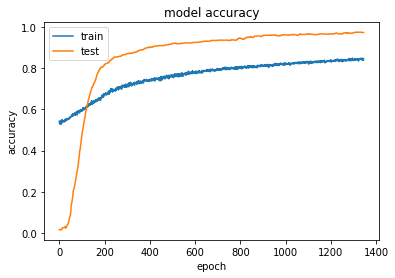

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

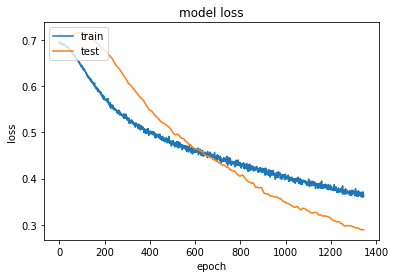

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(x_test)

31/31 [==============================] - 0s 2ms/step


In [ ]:
pred = (np.rint(pred)).astype(int)

In [ ]:
y_test_unique, y_test_counts = np.unique(y_test, return_counts=True)
dict(zip(y_test_unique, y_test_counts))

{0: 929, 1: 53}

In [ ]:
unique, counts = np.unique(pred, return_counts=True)
dict(zip(unique, counts))

{0: 735, 1: 247}

In [ ]:
print('Classification report:\n', classification_report(y_test, pred))

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       929
           1       0.15      0.72      0.25        53

    accuracy                           0.77       982
   macro avg       0.57      0.75      0.56       982
weighted avg       0.94      0.77      0.83       982



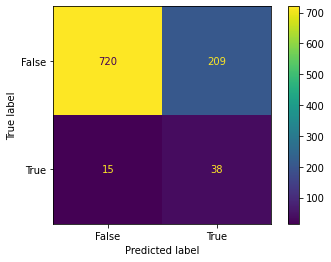

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
model.save("stroke_model.h5")
model.save("stroke_model.json")
pickle.dump(model, open('stroke_model.pkl','wb'))
print("Saved model to disk")

Saved model to disk
